In [35]:
import sys

sys.path.append("../../src")
from config import Paths
import pandas as pd

df = pd.read_csv(
    Paths.testnino1_classification_task,
    usecols=[
        "id",
        "Lang",
        "Argomento",
        "Data",
        "Link",
        "Titolo",
        "Testo",
        "Stato Workflow",
    ],
)

df["Data"] = pd.to_datetime(df["Data"])
df["text"] = df["Titolo"] + ". " + df["Testo"]

# df.set_index('id', inplace=True)

target_column = "Stato Workflow"

# remove rows not validated by the analyst
df = df[df[target_column] != "N"]

df['Stato Workflow'] = df['Stato Workflow'].replace('Y', 1)
df['Stato Workflow'] = df['Stato Workflow'].replace('D', 0)


lang = "all"
# df = df[df['Lang'] == lang]

print(df.dtypes)
print(df.shape)

df

id                         int64
Data              datetime64[ns]
Argomento                 object
Link                      object
Titolo                    object
Testo                     object
Lang                      object
Stato Workflow             int64
text                      object
dtype: object
(6857, 9)


,id,Data,Argomento,Link,Titolo,Testo,Lang,Stato Workflow,text
21,1183085712,2023-10-01,FOSCARINI,http://www.instagram.com/p/Cx4rX8bIpqk,Carmine Abate Architetto - carmine_abate_archi...,Carmine Abate Architetto - carmine_abate_archi...,IT,1,Carmine Abate Architetto - carmine_abate_archi...
147,1183650630,2023-10-01,FOSCARINI,http://www.instagram.com/p/Cx3WMtZt7TU,Hotel Muchele - hotel_muchele (5040069464),Hotel Muchele - hotel_muchele (5040069464) 42 ...,EN,1,Hotel Muchele - hotel_muchele (5040069464). Ho...
148,1183650631,2023-10-02,FOSCARINI,http://www.instagram.com/p/Cx31kqFJtS0,AdrianaValle PatriciaCarvalho - migsarquitetur...,AdrianaValle PatriciaCarvalho - migsarquitetur...,EN,1,AdrianaValle PatriciaCarvalho - migsarquitetur...
152,1183731635,2023-10-02,LOUISPOULSEN,http://www.instagram.com/p/Cx38Y5ZysBx,miya《東京カフェ巡り》 - miya_tokyocafe (40616149605),miya《東京カフェ巡り》 - miya_tokyocafe (40616149605) 2...,JA,1,miya《東京カフェ巡り》 - miya_tokyocafe (40616149605). ...
155,1183875489,2023-10-02,FLOS,http://www.instagram.com/p/Cx4KaQbPMMx,✴︎an yuma✴︎ interior/life/beauty... - anyuma_n...,✴︎an yuma✴︎ interior/life/beauty... - anyuma_n...,JA,1,✴︎an yuma✴︎ interior/life/beauty... - anyuma_n...
...,...,...,...,...,...,...,...,...,...
12832,1210172722,2023-10-31,LOUISPOULSEN,https://twitter.com/matt_meeta/status/17195000...,matt_meeta@twitter.com (Fridtjof Meeta),"matt_meeta@twitter.com (Fridtjof Meeta) ph5, p...",EN,1,matt_meeta@twitter.com (Fridtjof Meeta). matt_...
12833,1210172729,2023-10-31,LOUISPOULSEN,https://twitter.com/HB/status/1719472193057206768,HB@twitter.com (House Beautiful UK),HB@twitter.com (House Beautiful UK) Why every ...,EN,1,HB@twitter.com (House Beautiful UK). HB@twitte...
12835,1210277547,2023-10-31,FLOS,https://internityhome.pl/inspiracje/koncept-na...,Koncept na dom w klimacie przytulnego loftu | ...,Koncept na dom w klimacie przytulnego loftu | ...,PL,0,Koncept na dom w klimacie przytulnego loftu | ...
12837,1210710403,2023-10-31,FLOS,https://www.elle.se/decoration/snygga-bordslam...,Snygg bordslampa 2023 – snygga köp till hemmet...,Snygg bordslampa 2023 – snygga köp till hemmet...,SV,1,Snygg bordslampa 2023 – snygga köp till hemmet...


Stato Workflow
0    4225
1    2632
Name: count, dtype: int64


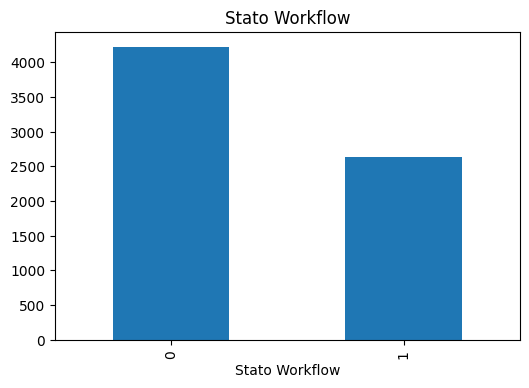

Stato Workflow     0    1
Argomento                
ARTEMIDE        1059  284
FLOS            1342  714
FOSCARINI        516  334
INGOMAURER       273  209
LOUISPOULSEN     545  679
OCCHIO           203  164
VIBIA            287  248


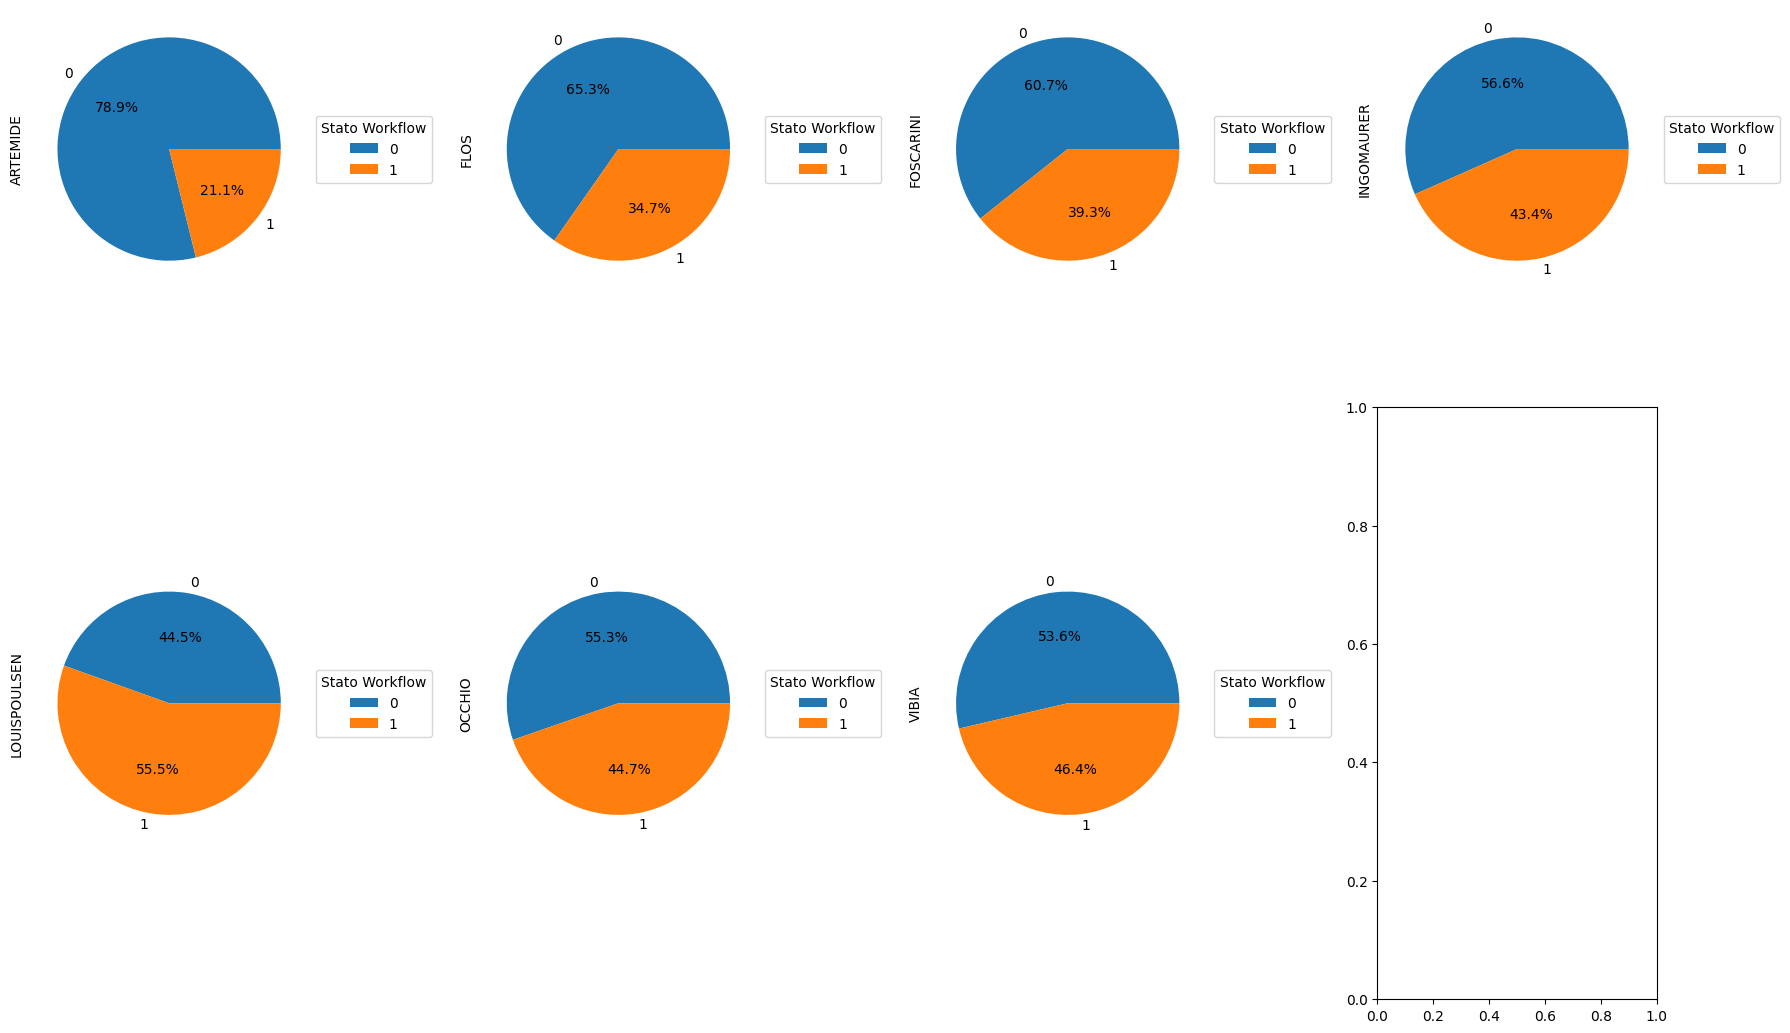

In [36]:
import matplotlib.pyplot as plt

# Plot the data by 'Stato Workflow'
column_counts = df[target_column].value_counts()
print(column_counts)
column_counts.plot(kind='bar', figsize=(6, 4))
plt.title(target_column)
plt.show()

# Partition the data by 'Argomento' and display a table
partitioned_data = df.groupby('Argomento')[target_column].value_counts().unstack()
print(partitioned_data)

# Calculate the number of rows and columns for the subplots
num_rows = (len(partitioned_data) + 3) // 4
num_cols = min(len(partitioned_data), 4)

# Plot a pie chart for each 'Argomento'
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 12))

# Iterate over the partitioned data and plot the pie charts
for i, (argomento, data) in enumerate(partitioned_data.iterrows()):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    data.plot.pie(ax=ax, autopct='%1.1f%%')
    ax.legend(title=target_column, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()

In [40]:
from sklearn.model_selection import cross_val_predict, cross_validate
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import cross_val_score

argomento = "OCCHIO"
input_feature = "text"
target_variable = "Stato Workflow"

# Filter the dataframe for the specified Argomento
df_argomento = df[df["Argomento"] == argomento]

# df_argomento = df_argomento.sample(n=100, random_state=42)


# Split the data into input features (X) and target variable (y)
X = df_argomento[input_feature]
y = df_argomento[target_variable]

# Calculate evaluation metrics
# to_dense = FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)



# Modify the pipeline to include the to_dense transformer
pipeline = Pipeline(
    [
        ("vect", CountVectorizer()),
        ("tfidf", TfidfTransformer()),
        # ("to_dense", to_dense),
        ("clf", GradientBoostingClassifier()),
    ]
)

# Define the metrics you want to evaluate
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Perform k-fold cross-validation and calculate the scores
scores = cross_validate(pipeline, X, y, cv=5, scoring=scoring)

# Print the scores for each metric
for metric in scoring:
    print(f"{metric}: {scores['test_'+metric].mean():.2f} (std: {scores['test_'+metric].std():.2f})")



accuracy: 0.86 (std: 0.06)
precision: 0.88 (std: 0.07)
recall: 0.79 (std: 0.12)
f1: 0.83 (std: 0.09)


In [43]:
import time
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.pipeline import FeatureUnion, FunctionTransformer, Pipeline
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.preprocessing import FunctionTransformer

to_dense = FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)
argomento_names = partitioned_data.index.tolist()

# features = FeatureUnion(
#     [
#         (
#             "text_features",
#             Pipeline(
#                 [
#                     ("vect", CountVectorizer()),
#                     ("tfidf", TfidfTransformer()),
#                 ]
#             ),
#         ),
#         (
#             "lang_feature",
#             FunctionTransformer(lambda x: x["Lang"].values.reshape(-1, 1), validate=False)
#         ),
#     ]
# )

features = (
    "text_features",
    Pipeline(
        [
            ("vect", CountVectorizer()),
            ("tfidf", TfidfTransformer()),
        ]
    ),
)


def buildPipelineFor(classifier) -> Pipeline:
    pipeline = None
    if (
        isinstance(clf, GaussianProcessClassifier)
        or isinstance(clf, GaussianNB)
        or isinstance(clf, QuadraticDiscriminantAnalysis)
        or isinstance(clf, LinearDiscriminantAnalysis)
    ):
        pipeline = Pipeline(
            [
                ("vect", CountVectorizer()),
                ("tfidf", TfidfTransformer()),
                ("to_dense", to_dense),
                ("clf", clf),
            ]
        )
    else:
        pipeline = Pipeline(
            [
                ("vect", CountVectorizer()),
                ("tfidf", TfidfTransformer()),
                ("clf", clf),
            ]
        )
    return pipeline


classifiers = [
    GradientBoostingClassifier(random_state=42),
    KNeighborsClassifier(n_jobs=-1),
    SVC(random_state=42),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(n_jobs=-1, random_state=42),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    AdaBoostClassifier(random_state=42),
    GaussianNB(),
    LogisticRegression(random_state=42),
    LinearDiscriminantAnalysis(),
    ExtraTreesClassifier(n_jobs=-1, random_state=42),
    SGDClassifier(random_state=42),
]


datasets = {
    25: {},
    50: {},
    100: {},
    200: {},
    500: {},
    750: {},
    1000: {},
}

# TODO: 1. For each dataset for each Argomento:
# fit/test
# EXPORT in csv results adding an argomento field
#  TODO: 2. ADD Lang as input feature

# create balanced X_train and y_train for each Argomento
for key in datasets.keys():
    # create one classifier per argomento
    for argomento in argomento_names:
        # filter df by argomento
        df_argomento = df[df["Argomento"].str.contains(argomento)]

        # NOT ENOUGH DATA
        if key * 2 > df_argomento.shape[0]:
            datasets[key][argomento] = None
            continue

        class_Y = df_argomento[df_argomento["Stato Workflow"] == 1]
        class_D = df_argomento[df_argomento["Stato Workflow"] == 0]

        sampled_Y = class_Y.sample(int(key / 2), random_state=42)
        sampled_D = class_D.sample(int(key / 2), random_state=42)

        # Concatenate the results
        balanced_train = pd.concat([sampled_Y, sampled_D])
        # balanced_X_train = balanced_train[["text", "Lang"]]
        balanced_X_train = balanced_train["text"]
        balanced_y_train = balanced_train["Stato Workflow"]

        df_test = df_argomento[~df_argomento["id"].isin(balanced_train["id"])]

        X_test = df_test["text"]
        y_test = df_test["Stato Workflow"]

        # use balanced X train
        datasets[key][argomento] = [balanced_X_train, X_test, balanced_y_train, y_test]

# for key in datasets.keys():
#     for argomento in datasets[key].keys():
#         df_list = datasets[key][argomento]
#         df_list[0].to_csv(f"{key}-{argomento}-X_train.csv", index=False)
#         df_list[1].to_csv(f"{key}-{argomento}-X_test.csv", index=False)
#         df_list[2].to_csv(f"{key}-{argomento}-y_train.csv", index=False)
#         df_list[3].to_csv(f"{key}-{argomento}-y_test.csv", index=False)


cms = {}
accuracies = {}
fit_times = {}
prediction_times = {}


# Create a FunctionTransformer to convert sparse matrices to dense ones
to_dense = FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)


# Create pipelines
for clf in classifiers:
    # Create a separate pipeline for the classifiers needing dense vectors
    pipeline = buildPipelineFor(classifier=clf)

    for key in datasets.keys():
        for argomento in argomento_names:
            # NOT enough data!
            if datasets[key][argomento] == None:
                continue
            
            model_name = (
                f"{argomento}-{key}-{clf.__class__.__name__}-{clf.get_params()}"
            )
            X_train = datasets[key][argomento][0]
            X_test = datasets[key][argomento][1]
            y_train = datasets[key][argomento][2]
            y_test = datasets[key][argomento][3]

            print("***************************************************************")
            print(f"Evaluating model {model_name}...")
            try:
                start_time = time.time()
                pipeline.fit(X_train, y_train)
                fit_time = time.time() - start_time
                fit_times[model_name] = fit_time

                start_time = time.time()
                y_pred = pipeline.predict(X_test)
                prediction_time = time.time() - start_time
                prediction_times[model_name] = prediction_time

                cm = confusion_matrix(y_test, y_pred)
                cms[model_name] = cm

                accuracy = accuracy_score(y_test, y_pred)
                accuracies[model_name] = accuracy

                print(f"{model_name}")
                print(f"{accuracy:.2f}")
                print(
                    "***************************************************************\n\n"
                )
            except Exception as e:
                print(f"An error occurred: {str(e)}")

import pickle

# Save the dictionaries to a file
with open(f"results_{lang}.pkl", "wb") as file:
    pickle.dump(cms, file)
    pickle.dump(accuracies, file)
    pickle.dump(fit_times, file)
    pickle.dump(prediction_times, file)

***************************************************************
Evaluating model ARTEMIDE-25-GradientBoostingClassifier-{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}...
ARTEMIDE-25-GradientBoostingClassifier-{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 

In [ ]:
for model_name, accuracy in accuracies.items():
    print(model_name)
    print(f"{accuracy:.2f}")
    print(f"{cms[model_name]}")
    print(f"fit_time: {fit_times[model_name]:.2f}")
    print(f"prediction_time: {prediction_times[model_name]:.2f}")
    print()
